In [56]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_excel(r"C:\Users\ASUS\Desktop\projects\Data_Train (1).xlsx")

In [58]:
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [59]:
df[(df['Source'] == 'Banglore')&(df['Destination'] == 'New Delhi')]['Route'].unique()

array(['BLR → DEL', 'BLR → NAG → DEL', 'BLR → BOM → DEL',
       'BLR → COK → DEL', 'BLR → BOM → AMD → DEL', 'BLR → MAA → DEL',
       'BLR → HYD → DEL', 'BLR → BOM → JDH → DEL', 'BLR → CCU → DEL',
       'BLR → CCU → GAU → DEL', 'BLR → PNQ → DEL',
       'BLR → BOM → BHO → DEL', 'BLR → LKO → DEL', 'BLR → AMD → DEL',
       'BLR → VGA → DEL', 'BLR → BOM → IDR → DEL', 'BLR → BBI → DEL',
       'BLR → GOI → DEL', 'BLR → CCU → BBI → DEL',
       'BLR → BOM → NAG → DEL', 'BLR → CCU → BBI → HYD → DEL',
       'BLR → GAU → DEL', 'BLR → HYD → VGA → DEL',
       'BLR → VGA → HYD → DEL', 'BLR → BOM → IDR → GWL → DEL',
       'BLR → BDQ → DEL', 'BLR → TRV → COK → DEL', 'BLR → IDR → DEL',
       'BLR → BOM → UDR → DEL', 'BLR → VGA → VTZ → DEL',
       'BLR → HBX → BOM → BHO → DEL', 'BLR → HBX → BOM → AMD → DEL',
       'BLR → STV → DEL', 'BLR → HBX → BOM → NAG → DEL',
       'BLR → BOM → IXC → DEL', 'BLR → CCU → BBI → HYD → VGA → DEL'],
      dtype=object)

In [60]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

Price is our target variable

In [61]:
df.shape

(10683, 11)

In [62]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

#### dtypes is not to check whether it is categorical or numerical even , numerical type can also be object type thats why we describe to cross check

In [63]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [64]:
df.dropna(inplace = True)

In [65]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [66]:
df.shape

(10682, 11)

In [67]:
df[['Airline','Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info']].describe()


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10682,10682,10682,10682,10682,10682,10682,10682,10682
unique,12,5,6,128,222,1343,368,5,10
top,Jet Airways,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,4536,4536,2376,233,423,550,5625,8344


#### Also used for initial EDA 5 point summary 
Describe also helps to identify whether column is categorical or not

Dataset contains no numerical columns all are categorical columns

In [68]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [69]:
for i in df.columns:
    print(df[i].unique())

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK'
 'CCU → NAG → BLR' 'BLR → NAG → DEL' 'CCU → BLR' 'BLR → BOM → DEL'

#### Price of flight with business class has highest fare with limited bookings

In [70]:
df.Date_of_Journey = df.Date_of_Journey.str.split('/')
df.Date_of_Journey

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10682, dtype: object

In [71]:
df['Date'] = df.Date_of_Journey.str[0]

In [72]:
df['month'] = df.Date_of_Journey.str[1]

In [73]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,month
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,04
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,04
10680,Jet Airways,"[27, 04, 2019]",Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,04
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,01,03


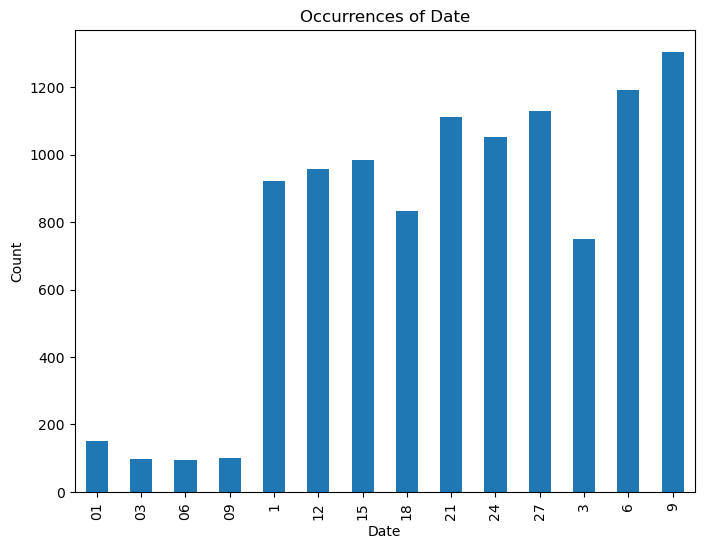

In [74]:
# Count the occurrences of each month
Date_counts = df['Date'].value_counts()

# Sort the months in chronological order
Date_counts = Date_counts.sort_index()

# Plot the count of occurrences
plt.figure(figsize=(8, 6))
Date_counts.plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Occurrences of Date')
plt.show()

### Inference: Here in the above graph we have plotted the plot for journey in a Date vs several flights and got to see that day 09 of month has the most number of flights.

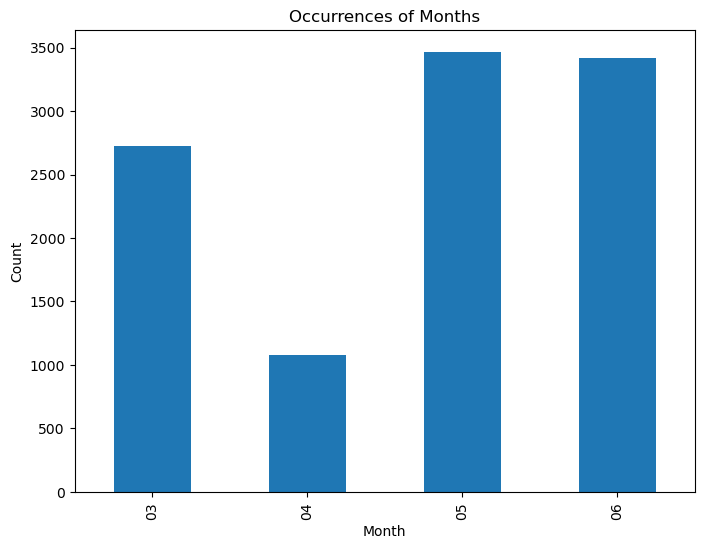

In [75]:
# Count the occurrences of each month
month_counts = df['month'].value_counts()

# Sort the months in chronological order
month_counts = month_counts.sort_index()

# Plot the count of occurrences
plt.figure(figsize=(8, 6))
month_counts.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Occurrences of Months')
plt.show()



### Inference: Here in the above graph we have plotted the plot for journey in a month vs several flights and got to see that May has the most number of flights.

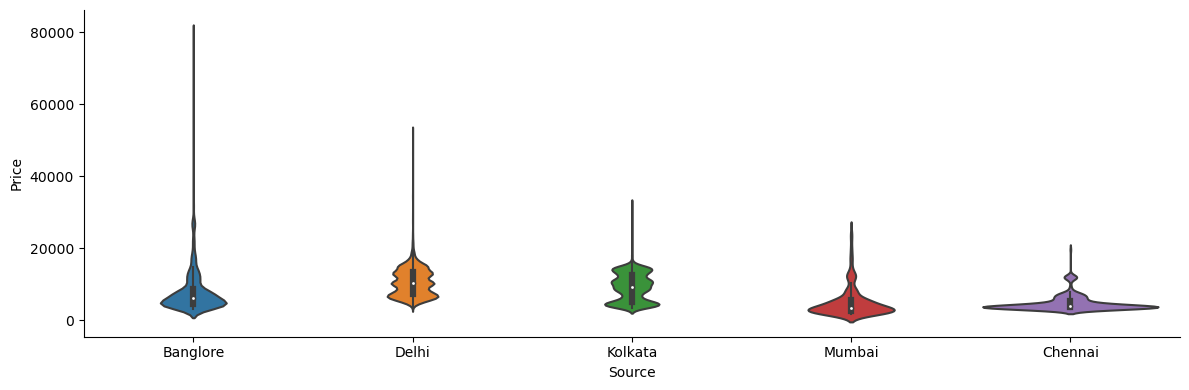

In [76]:
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="violin", height = 4, aspect = 3)
plt.show()

### Inference: Now with the help of cat plot only we are plotting a box plot between the price of the flight and the source place i.e. the place from where passengers will travel to the destination and we can see that Banglore as the source location has the most outliers while Chennai has the least.

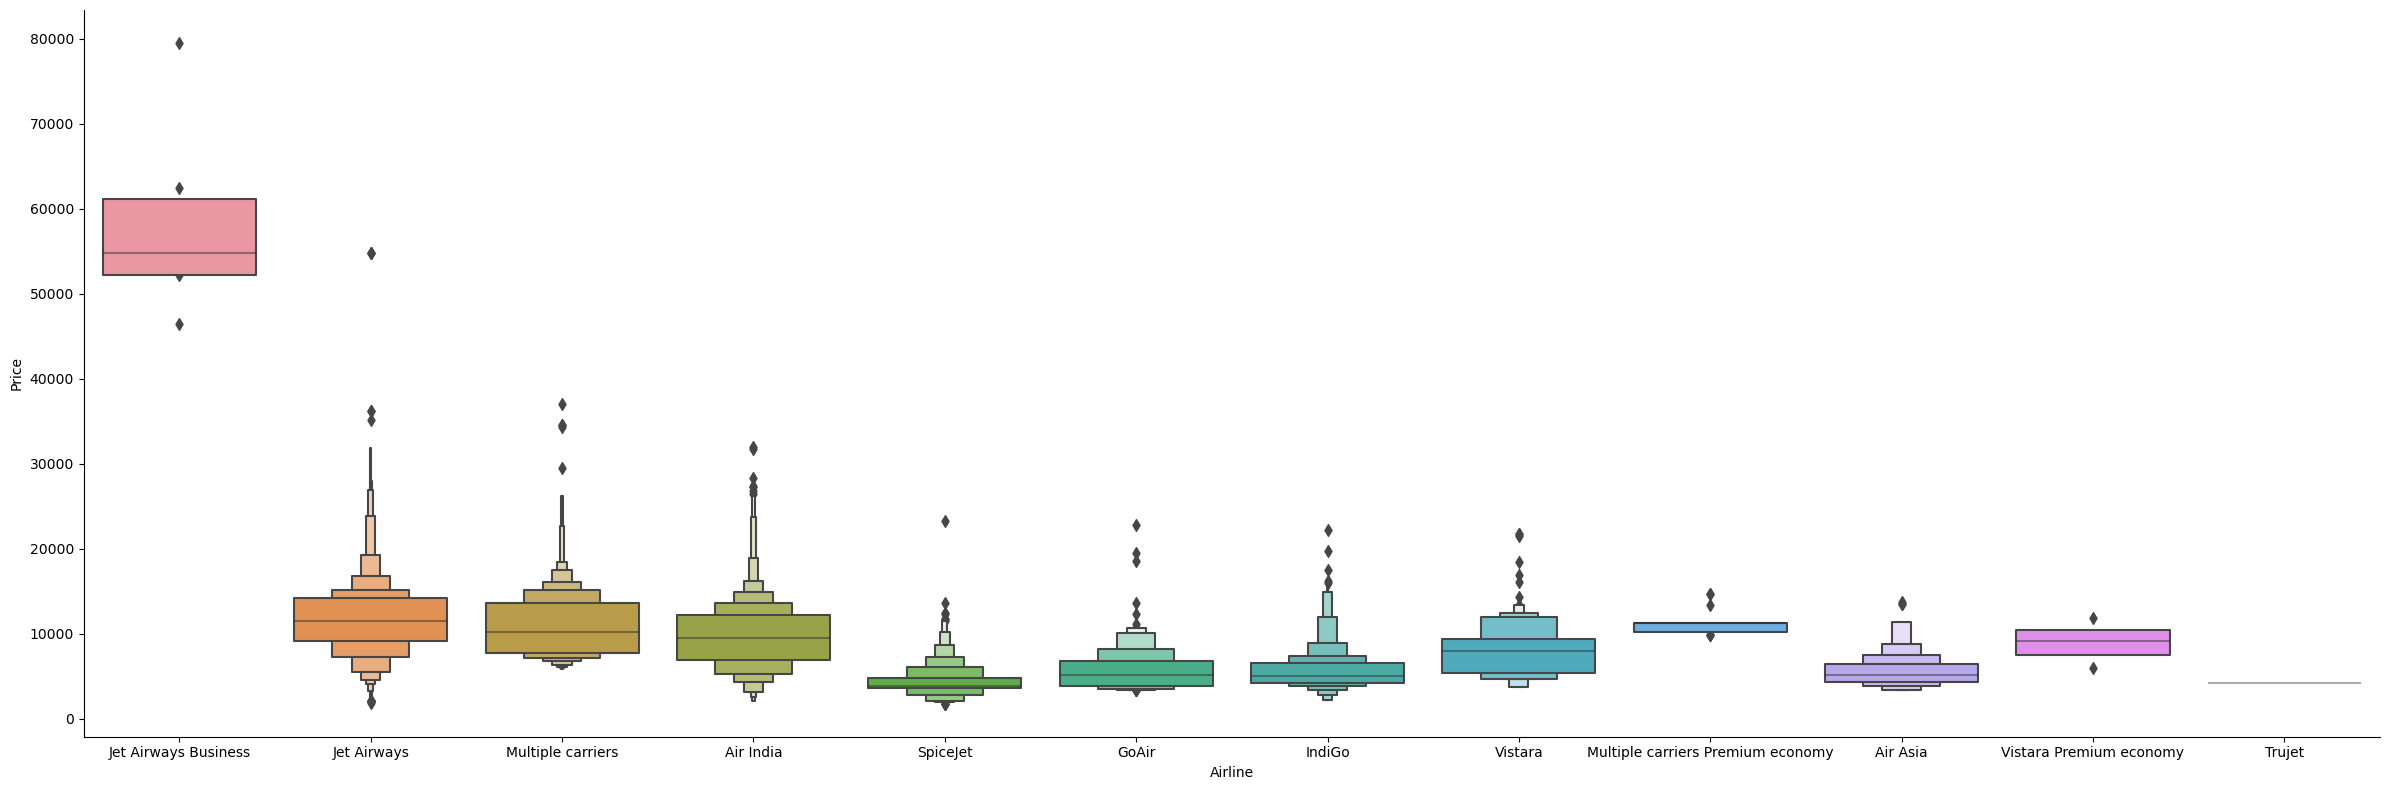

In [77]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

### Inference: Here with the help of the cat plot we are trying to plot the boxplot between the price of the flight and airline and we can conclude that Jet Airways has the most outliers in terms of price.

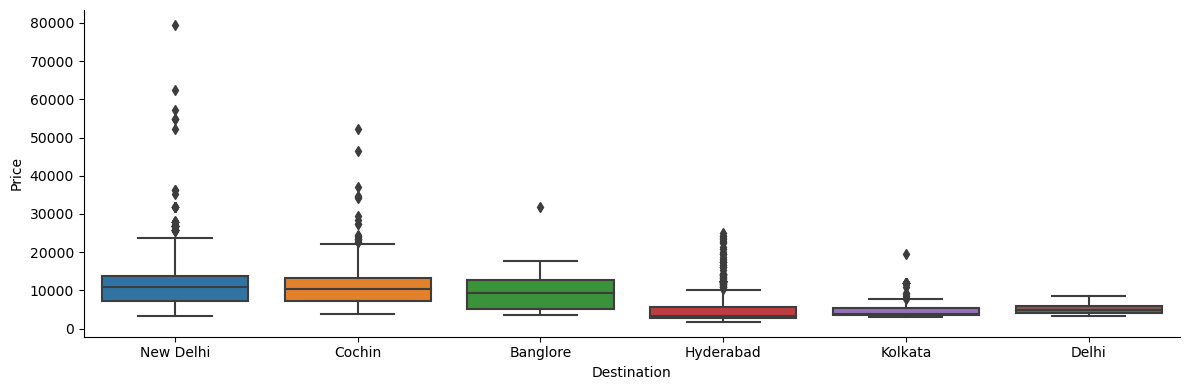

In [78]:
sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

### Inference: Now with the help of cat plot only we are plotting a box plot between the price of the flight and the source place i.e. the place from where passengers will travel to the destination and we can see that Banglore as the source location has the most outliers while Chennai has the least.

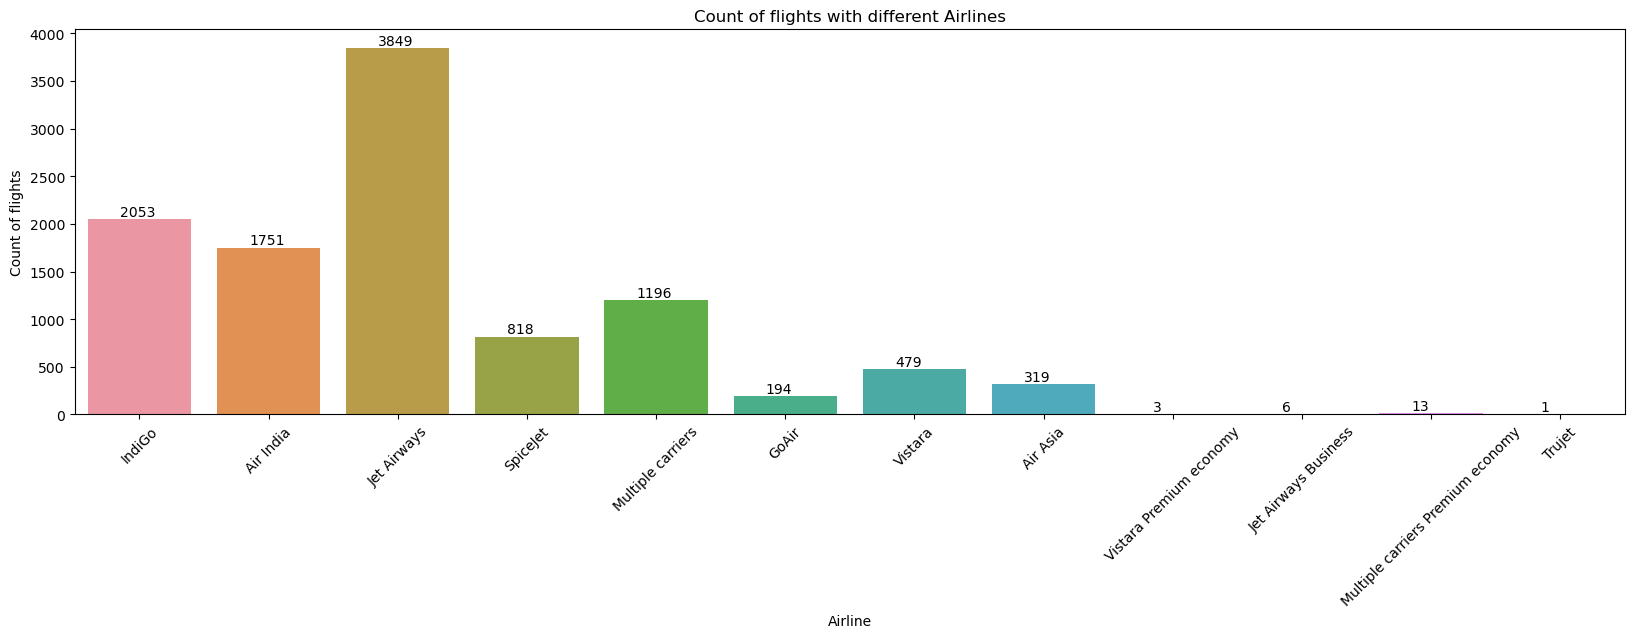

In [79]:
plt.figure(figsize = (20,5))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')


### Inference : Jet airways are booked more often

In [80]:
#Now I want to remove column arrival because we already have duration problem but we need to prove it that column is of no use 
#steps
#we will take departure and arrival columns find their difference and equate it with duration 
#find correlation if correlation if high we can drop the column

# Convert Arrival time and Departure time to time format

# destination data contains both delhi and new delhi which is same
df['Destination'] = df['Destination'].replace('Delhi' , 'New Delhi')
df['Destination'].unique()
df



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,month
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,04
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,04
10680,Jet Airways,"[27, 04, 2019]",Banglore,New Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,04
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,01,03


In [81]:
# Converting departure time into category of 4 hours to check its relationship with Price (Target variable)
#using bins 
# Convert the 'Departure' column to datetime format
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], format='%H:%M')
df
# Bin the 'Departure' column into 6 quantiles
df['Departure_Quantiles'] = pd.qcut(df['Dep_Time'].dt.hour, q=6, labels=['Q1', 'Q2', 'Q3', 'Q4','Q5','Q6']) #dividing 24/6 = 4 hours range
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,month,Departure_Quantiles
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,Q6
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,13:15,7h 25m,2 stops,No info,7662,1,05,Q1
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,04:25 10 Jun,19h,2 stops,No info,13882,9,06,Q2
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,23:30,5h 25m,1 stop,No info,6218,12,05,Q5
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,21:35,4h 45m,1 stop,No info,13302,01,03,Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,CCU → BLR,1900-01-01 19:55:00,22:25,2h 30m,non-stop,No info,4107,9,04,Q5
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,CCU → BLR,1900-01-01 20:45:00,23:20,2h 35m,non-stop,No info,4145,27,04,Q6
10680,Jet Airways,"[27, 04, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 08:20:00,11:20,3h,non-stop,No info,7229,27,04,Q2
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 11:30:00,14:10,2h 40m,non-stop,No info,12648,01,03,Q3


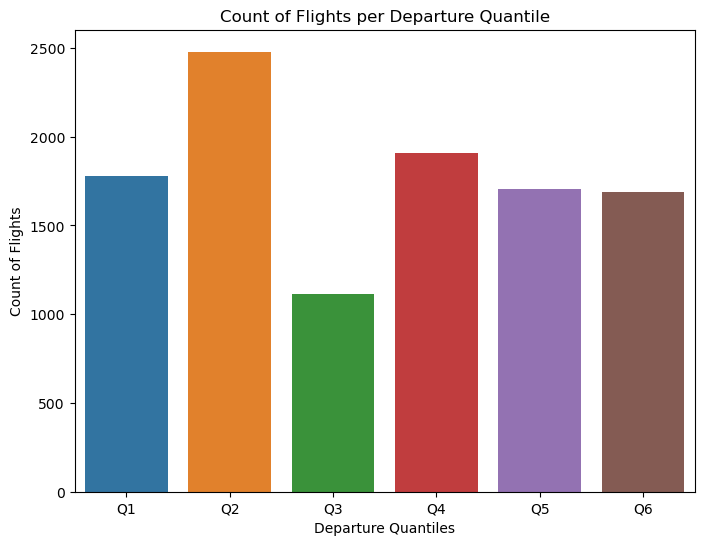

In [82]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Departure_Quantiles')  # Change 'x' to 'y' for vertical orientation
plt.title('Count of Flights per Departure Quantile')
plt.xlabel('Departure Quantiles')
plt.ylabel('Count of Flights')
plt.show()

### Q2 are booked more often compared to others

In [83]:
# convert arrival_time column to string type
df['Arrival_Time'] = df['Arrival_Time'].astype(str)
# extract time part from arrival_time column
df['Arrival_Time'] = df['Arrival_Time'].str.split(' ').str[0]
df
#pd.to_datetime function returns a NaT value (not a time). We have specified errors='coerce' argument to handle such errors and return NaT value.

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,month,Departure_Quantiles
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,01:10,2h 50m,non-stop,No info,3897,24,03,Q6
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,13:15,7h 25m,2 stops,No info,7662,1,05,Q1
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,04:25,19h,2 stops,No info,13882,9,06,Q2
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,23:30,5h 25m,1 stop,No info,6218,12,05,Q5
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,21:35,4h 45m,1 stop,No info,13302,01,03,Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,CCU → BLR,1900-01-01 19:55:00,22:25,2h 30m,non-stop,No info,4107,9,04,Q5
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,CCU → BLR,1900-01-01 20:45:00,23:20,2h 35m,non-stop,No info,4145,27,04,Q6
10680,Jet Airways,"[27, 04, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 08:20:00,11:20,3h,non-stop,No info,7229,27,04,Q2
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 11:30:00,14:10,2h 40m,non-stop,No info,12648,01,03,Q3


In [84]:
# Convert the 'Arrival_Time' column to datetime format
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'], format='%H:%M')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,month,Departure_Quantiles
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,1900-01-01 01:10:00,2h 50m,non-stop,No info,3897,24,03,Q6
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,1900-01-01 13:15:00,7h 25m,2 stops,No info,7662,1,05,Q1
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,1900-01-01 04:25:00,19h,2 stops,No info,13882,9,06,Q2
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,1900-01-01 23:30:00,5h 25m,1 stop,No info,6218,12,05,Q5
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,1900-01-01 21:35:00,4h 45m,1 stop,No info,13302,01,03,Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,CCU → BLR,1900-01-01 19:55:00,1900-01-01 22:25:00,2h 30m,non-stop,No info,4107,9,04,Q5
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,CCU → BLR,1900-01-01 20:45:00,1900-01-01 23:20:00,2h 35m,non-stop,No info,4145,27,04,Q6
10680,Jet Airways,"[27, 04, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 08:20:00,1900-01-01 11:20:00,3h,non-stop,No info,7229,27,04,Q2
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 11:30:00,1900-01-01 14:10:00,2h 40m,non-stop,No info,12648,01,03,Q3


In [85]:
# Calculate the difference between 'Arrival' and 'Departure' columns
df['Difference'] = df['Arrival_Time'] - df['Dep_Time']
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,month,Departure_Quantiles,Difference
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,1900-01-01 01:10:00,2h 50m,non-stop,No info,3897,24,03,Q6,-1 days +02:50:00
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,1900-01-01 13:15:00,7h 25m,2 stops,No info,7662,1,05,Q1,0 days 07:25:00
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,1900-01-01 04:25:00,19h,2 stops,No info,13882,9,06,Q2,-1 days +19:00:00
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,1900-01-01 23:30:00,5h 25m,1 stop,No info,6218,12,05,Q5,0 days 05:25:00
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,1900-01-01 21:35:00,4h 45m,1 stop,No info,13302,01,03,Q4,0 days 04:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,CCU → BLR,1900-01-01 19:55:00,1900-01-01 22:25:00,2h 30m,non-stop,No info,4107,9,04,Q5,0 days 02:30:00
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,CCU → BLR,1900-01-01 20:45:00,1900-01-01 23:20:00,2h 35m,non-stop,No info,4145,27,04,Q6,0 days 02:35:00
10680,Jet Airways,"[27, 04, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 08:20:00,1900-01-01 11:20:00,3h,non-stop,No info,7229,27,04,Q2,0 days 03:00:00
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 11:30:00,1900-01-01 14:10:00,2h 40m,non-stop,No info,12648,01,03,Q3,0 days 02:40:00


### As we can Difference column and Duration columns are Highly correlated means: <br>
#### Arrival time - depature time = Difference is equal to duration column.
we have proven it using data so now we have enough evidence using data to drop arrival column as it is of no use we have duration column to check relation with target variable

In [86]:
df.drop('Arrival_Time' , axis = 1, inplace = True)

In [87]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,month,Departure_Quantiles,Difference
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,2h 50m,non-stop,No info,3897,24,03,Q6,-1 days +02:50:00
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,7h 25m,2 stops,No info,7662,1,05,Q1,0 days 07:25:00
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,19h,2 stops,No info,13882,9,06,Q2,-1 days +19:00:00
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,5h 25m,1 stop,No info,6218,12,05,Q5,0 days 05:25:00
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,4h 45m,1 stop,No info,13302,01,03,Q4,0 days 04:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,CCU → BLR,1900-01-01 19:55:00,2h 30m,non-stop,No info,4107,9,04,Q5,0 days 02:30:00
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,CCU → BLR,1900-01-01 20:45:00,2h 35m,non-stop,No info,4145,27,04,Q6,0 days 02:35:00
10680,Jet Airways,"[27, 04, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 08:20:00,3h,non-stop,No info,7229,27,04,Q2,0 days 03:00:00
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 11:30:00,2h 40m,non-stop,No info,12648,01,03,Q3,0 days 02:40:00


In [88]:
# Convert "Duration" column to timedelta
df['Duration'] = pd.to_timedelta(df['Duration'])
# Create bins for the categories
bins = [pd.Timedelta(hours=0), pd.Timedelta(hours=3), pd.Timedelta(hours=6), pd.Timedelta(hours=12), pd.Timedelta(hours=24),pd.Timedelta(hours=30),pd.Timedelta(hours=35),pd.Timedelta(hours=60)]
# Create labels for the categories
labels = ['<3 hours', '3-6 hours', '6-12 hours', '12-24 hours','24-30 hours','30-35 hours','more than 35 hours']
# Use pd.cut() to categorize the "Duration" column
df['Duration Category'] = pd.cut(df['Duration'], bins=bins, labels=labels)

In [89]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,month,Departure_Quantiles,Difference,Duration Category
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,0 days 02:50:00,non-stop,No info,3897,24,03,Q6,-1 days +02:50:00,<3 hours
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,0 days 07:25:00,2 stops,No info,7662,1,05,Q1,0 days 07:25:00,6-12 hours
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,0 days 19:00:00,2 stops,No info,13882,9,06,Q2,-1 days +19:00:00,12-24 hours
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,0 days 05:25:00,1 stop,No info,6218,12,05,Q5,0 days 05:25:00,3-6 hours
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,0 days 04:45:00,1 stop,No info,13302,01,03,Q4,0 days 04:45:00,3-6 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,CCU → BLR,1900-01-01 19:55:00,0 days 02:30:00,non-stop,No info,4107,9,04,Q5,0 days 02:30:00,<3 hours
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,CCU → BLR,1900-01-01 20:45:00,0 days 02:35:00,non-stop,No info,4145,27,04,Q6,0 days 02:35:00,<3 hours
10680,Jet Airways,"[27, 04, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 08:20:00,0 days 03:00:00,non-stop,No info,7229,27,04,Q2,0 days 03:00:00,<3 hours
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 11:30:00,0 days 02:40:00,non-stop,No info,12648,01,03,Q3,0 days 02:40:00,<3 hours


#### We have got categories for Duration 

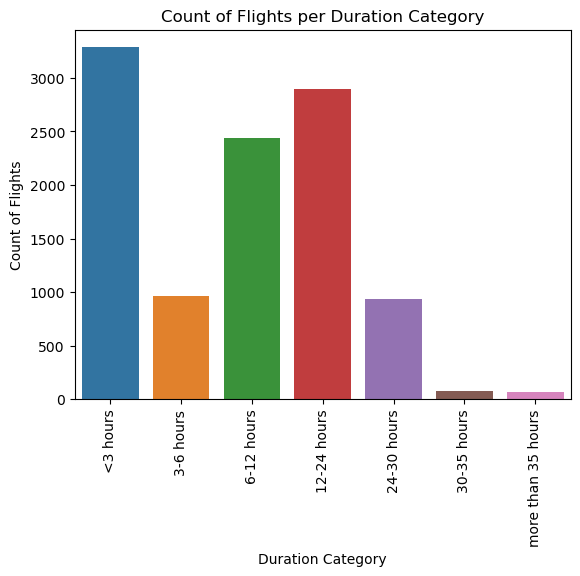

In [93]:
sns.countplot(data=df, x='Duration Category')
plt.xticks(rotation=90)
plt.title('Count of Flights per Duration Category')
plt.xlabel('Duration Category')
plt.ylabel('Count of Flights')
plt.show()

### Less than 3 Hours are booked more frequently

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '<3 hours'),
  Text(1, 0, '6-12 hours'),
  Text(2, 0, '12-24 hours'),
  Text(3, 0, '3-6 hours'),
  Text(4, 0, '24-30 hours'),
  Text(5, 0, '30-35 hours'),
  Text(6, 0, 'more than 35 hours')])

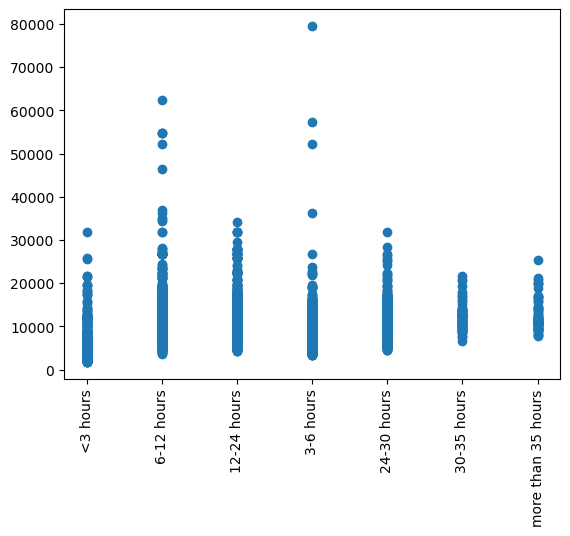

In [94]:
# create a line graph
plt.scatter(df['Duration Category'], df['Price'])
plt.xticks(rotation = 90)

<Axes: xlabel='Total_Stops', ylabel='count'>

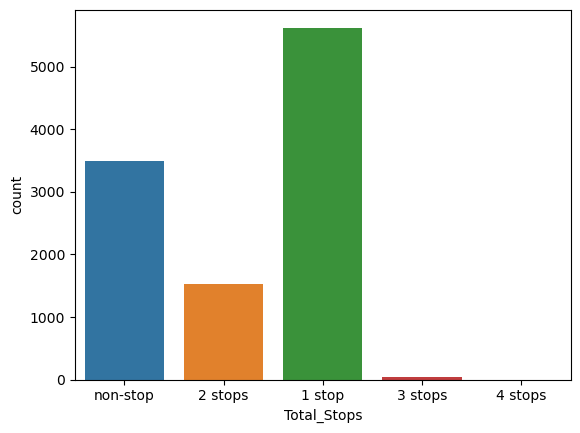

In [96]:
# create a bar graph
sns.countplot( data =df, x='Total_Stops')


### Inference :  1 stop flights are booked more often compared to others

In [97]:
x_axis = df['Total_Stops'].unique()

In [98]:
x_axis

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [99]:
data1 = df[df['Total_Stops'] == 'non-stop']['Price']

In [100]:
data2 = df[df['Total_Stops'] == '1 stop']['Price']

In [101]:
data3 = df[df['Total_Stops'] == '2 stops']['Price']

In [102]:
data4 = df[df['Total_Stops'] == '3 stops']['Price']

In [103]:
data5 = df[df['Total_Stops'] == '4 stops']['Price']

In [104]:
data4.shape

(45,)

In [105]:
data = [data1, data2,data3, data4,data5]

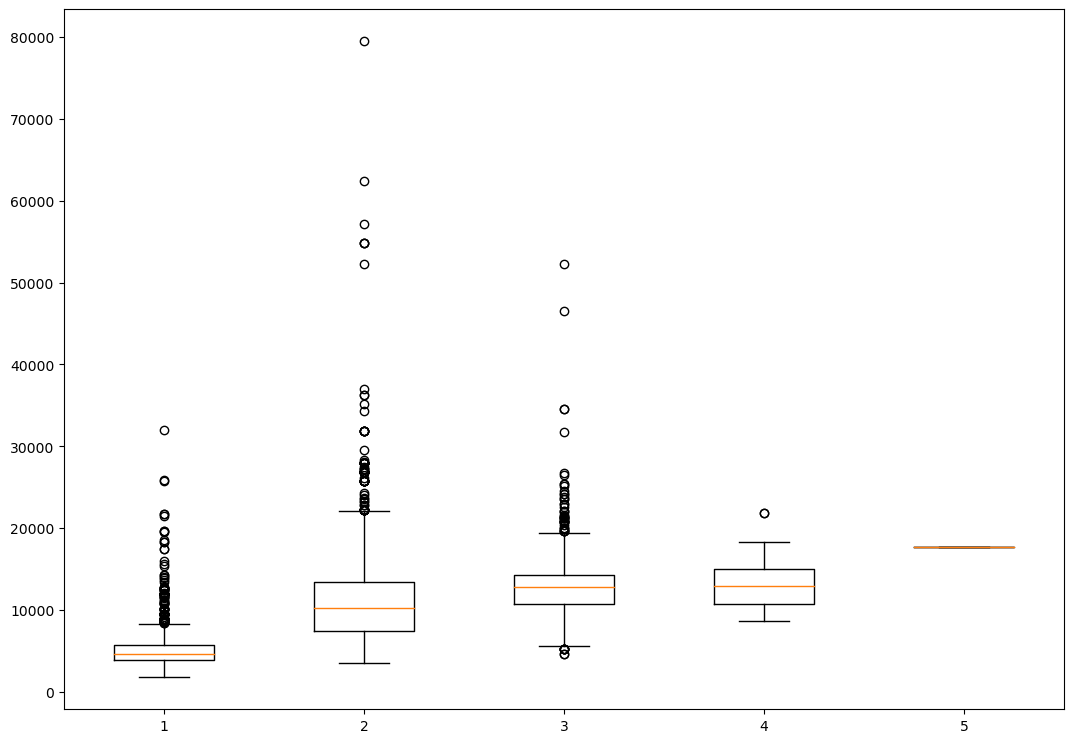

In [106]:
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

In [107]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,month,Departure_Quantiles,Difference,Duration Category
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,0 days 02:50:00,non-stop,No info,3897,24,03,Q6,-1 days +02:50:00,<3 hours
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,0 days 07:25:00,2 stops,No info,7662,1,05,Q1,0 days 07:25:00,6-12 hours
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,0 days 19:00:00,2 stops,No info,13882,9,06,Q2,-1 days +19:00:00,12-24 hours
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,0 days 05:25:00,1 stop,No info,6218,12,05,Q5,0 days 05:25:00,3-6 hours
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,0 days 04:45:00,1 stop,No info,13302,01,03,Q4,0 days 04:45:00,3-6 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,CCU → BLR,1900-01-01 19:55:00,0 days 02:30:00,non-stop,No info,4107,9,04,Q5,0 days 02:30:00,<3 hours
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,CCU → BLR,1900-01-01 20:45:00,0 days 02:35:00,non-stop,No info,4145,27,04,Q6,0 days 02:35:00,<3 hours
10680,Jet Airways,"[27, 04, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 08:20:00,0 days 03:00:00,non-stop,No info,7229,27,04,Q2,0 days 03:00:00,<3 hours
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 11:30:00,0 days 02:40:00,non-stop,No info,12648,01,03,Q3,0 days 02:40:00,<3 hours


In [108]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

 ### Since the maximum number of stops is 4, there should be maximum 6 cities in any particular route. We split the data in route column, and store all the city names in separate columns

In [109]:
df.Route = df.Route.str.split('→')
df.Route

0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
                    ...            
10678                  [CCU ,  BLR]
10679                  [CCU ,  BLR]
10680                  [BLR ,  DEL]
10681                  [BLR ,  DEL]
10682    [DEL ,  GOI ,  BOM ,  COK]
Name: Route, Length: 10682, dtype: object

In [110]:
df['City1'] = df.Route.str[0]
df['City2'] = df.Route.str[1]
df['City3'] = df.Route.str[2]
df['City4'] = df.Route.str[3]
df['City5'] = df.Route.str[4]
df['City6'] = df.Route.str[5]

In [111]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,...,month,Departure_Quantiles,Difference,Duration Category,City1,City2,City3,City4,City5,City6
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]",1900-01-01 22:20:00,0 days 02:50:00,non-stop,No info,3897,...,03,Q6,-1 days +02:50:00,<3 hours,BLR,DEL,NaN,NaN,NaN,NaN
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,"[CCU , IXR , BBI , BLR]",1900-01-01 05:50:00,0 days 07:25:00,2 stops,No info,7662,...,05,Q1,0 days 07:25:00,6-12 hours,CCU,IXR,BBI,BLR,NaN,NaN
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,"[DEL , LKO , BOM , COK]",1900-01-01 09:25:00,0 days 19:00:00,2 stops,No info,13882,...,06,Q2,-1 days +19:00:00,12-24 hours,DEL,LKO,BOM,COK,NaN,NaN
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,"[CCU , NAG , BLR]",1900-01-01 18:05:00,0 days 05:25:00,1 stop,No info,6218,...,05,Q5,0 days 05:25:00,3-6 hours,CCU,NAG,BLR,NaN,NaN,NaN
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , NAG , DEL]",1900-01-01 16:50:00,0 days 04:45:00,1 stop,No info,13302,...,03,Q4,0 days 04:45:00,3-6 hours,BLR,NAG,DEL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,"[CCU , BLR]",1900-01-01 19:55:00,0 days 02:30:00,non-stop,No info,4107,...,04,Q5,0 days 02:30:00,<3 hours,CCU,BLR,NaN,NaN,NaN,NaN
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,"[CCU , BLR]",1900-01-01 20:45:00,0 days 02:35:00,non-stop,No info,4145,...,04,Q6,0 days 02:35:00,<3 hours,CCU,BLR,NaN,NaN,NaN,NaN
10680,Jet Airways,"[27, 04, 2019]",Banglore,New Delhi,"[BLR , DEL]",1900-01-01 08:20:00,0 days 03:00:00,non-stop,No info,7229,...,04,Q2,0 days 03:00:00,<3 hours,BLR,DEL,NaN,NaN,NaN,NaN
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]",1900-01-01 11:30:00,0 days 02:40:00,non-stop,No info,12648,...,03,Q3,0 days 02:40:00,<3 hours,BLR,DEL,NaN,NaN,NaN,NaN


In [112]:
df.isna().sum()

Airline                    0
Date_of_Journey            0
Source                     0
Destination                0
Route                      0
Dep_Time                   0
Duration                   0
Total_Stops                0
Additional_Info            0
Price                      0
Date                       0
month                      0
Departure_Quantiles        0
Difference                 0
Duration Category          0
City1                      0
City2                      0
City3                   3491
City4                   9116
City5                  10636
City6                  10681
dtype: int64

### We choose to drop ‘City4’ ,'City 5' , 'City 6 ', column, since 9117 values out of 10683 rows contain NaN values. 

In [113]:
df.drop(['City4' ,'City5','City6'] , axis=1 , inplace = True)

In [114]:
df.isna().sum()

Airline                   0
Date_of_Journey           0
Source                    0
Destination               0
Route                     0
Dep_Time                  0
Duration                  0
Total_Stops               0
Additional_Info           0
Price                     0
Date                      0
month                     0
Departure_Quantiles       0
Difference                0
Duration Category         0
City1                     0
City2                     0
City3                  3491
dtype: int64

In [115]:
df['City3'].fillna('None' , inplace = True)

#### We further replace 'NaN' values in City3 with 'None', since rows where City3 is missing did not have any stop, just the source and the destination

In [116]:
df.isna().sum()

Airline                0
Date_of_Journey        0
Source                 0
Destination            0
Route                  0
Dep_Time               0
Duration               0
Total_Stops            0
Additional_Info        0
Price                  0
Date                   0
month                  0
Departure_Quantiles    0
Difference             0
Duration Category      0
City1                  0
City2                  0
City3                  0
dtype: int64

<Axes: xlabel='City1', ylabel='count'>

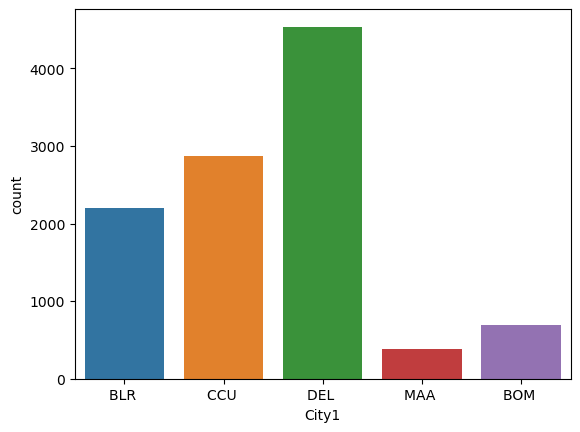

In [118]:
sns.countplot(data =df,x=df['City1'])

### City1

City1 has same data as source column


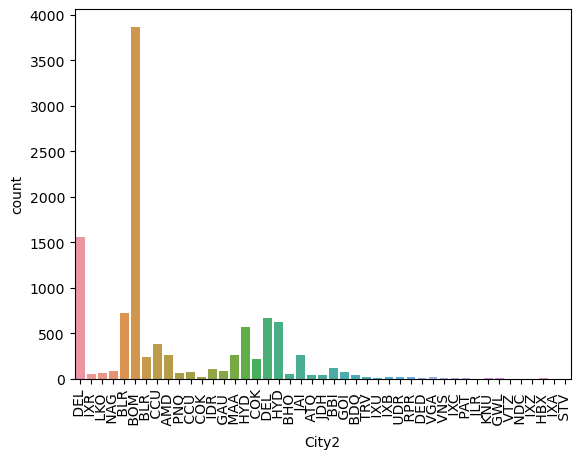

In [119]:
sns.countplot(data =df,x=df['City2'])
plt.xticks(rotation = 90)
plt.show()

### City2

Majority of the flights take a stop in Bombay.

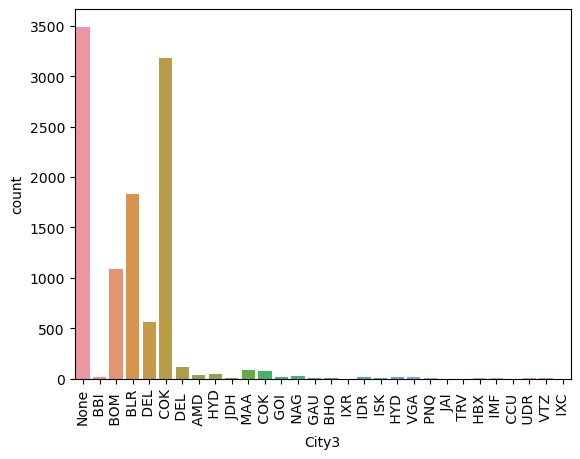

In [120]:
sns.countplot(data =df,x=df['City3'])
plt.xticks(rotation = 90)
plt.show()

### City3

Majority of the flights have no 2nd stop
If there is a second stop, chances are high of the place being Cochin.

In [121]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,month,Departure_Quantiles,Difference,Duration Category,City1,City2,City3
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]",1900-01-01 22:20:00,0 days 02:50:00,non-stop,No info,3897,24,03,Q6,-1 days +02:50:00,<3 hours,BLR,DEL,None
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,"[CCU , IXR , BBI , BLR]",1900-01-01 05:50:00,0 days 07:25:00,2 stops,No info,7662,1,05,Q1,0 days 07:25:00,6-12 hours,CCU,IXR,BBI
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,"[DEL , LKO , BOM , COK]",1900-01-01 09:25:00,0 days 19:00:00,2 stops,No info,13882,9,06,Q2,-1 days +19:00:00,12-24 hours,DEL,LKO,BOM
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,"[CCU , NAG , BLR]",1900-01-01 18:05:00,0 days 05:25:00,1 stop,No info,6218,12,05,Q5,0 days 05:25:00,3-6 hours,CCU,NAG,BLR
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , NAG , DEL]",1900-01-01 16:50:00,0 days 04:45:00,1 stop,No info,13302,01,03,Q4,0 days 04:45:00,3-6 hours,BLR,NAG,DEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,"[CCU , BLR]",1900-01-01 19:55:00,0 days 02:30:00,non-stop,No info,4107,9,04,Q5,0 days 02:30:00,<3 hours,CCU,BLR,None
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,"[CCU , BLR]",1900-01-01 20:45:00,0 days 02:35:00,non-stop,No info,4145,27,04,Q6,0 days 02:35:00,<3 hours,CCU,BLR,None
10680,Jet Airways,"[27, 04, 2019]",Banglore,New Delhi,"[BLR , DEL]",1900-01-01 08:20:00,0 days 03:00:00,non-stop,No info,7229,27,04,Q2,0 days 03:00:00,<3 hours,BLR,DEL,None
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]",1900-01-01 11:30:00,0 days 02:40:00,non-stop,No info,12648,01,03,Q3,0 days 02:40:00,<3 hours,BLR,DEL,None


In [122]:
df.drop(['Date_of_Journey' , 'Route' , 'Dep_Time' , 'Duration' , 'Difference'],axis = 1 , inplace = True)

In [123]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,month,Departure_Quantiles,Duration Category,City1,City2,City3
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,03,Q6,<3 hours,BLR,DEL,None
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,05,Q1,6-12 hours,CCU,IXR,BBI
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,06,Q2,12-24 hours,DEL,LKO,BOM
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,05,Q5,3-6 hours,CCU,NAG,BLR
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,01,03,Q4,3-6 hours,BLR,NAG,DEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,4107,9,04,Q5,<3 hours,CCU,BLR,None
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,27,04,Q6,<3 hours,CCU,BLR,None
10680,Jet Airways,Banglore,New Delhi,non-stop,No info,7229,27,04,Q2,<3 hours,BLR,DEL,None
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,01,03,Q3,<3 hours,BLR,DEL,None


In [124]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Date', 'month', 'Departure_Quantiles', 'Duration Category',
       'City1', 'City2', 'City3'],
      dtype='object')

In [125]:
categorical = df[['Airline','Source','Destination','Total_Stops','Additional_Info','Departure_Quantiles','Duration Category','City1','City2','City3']]
numerical = df[['Date','month']]

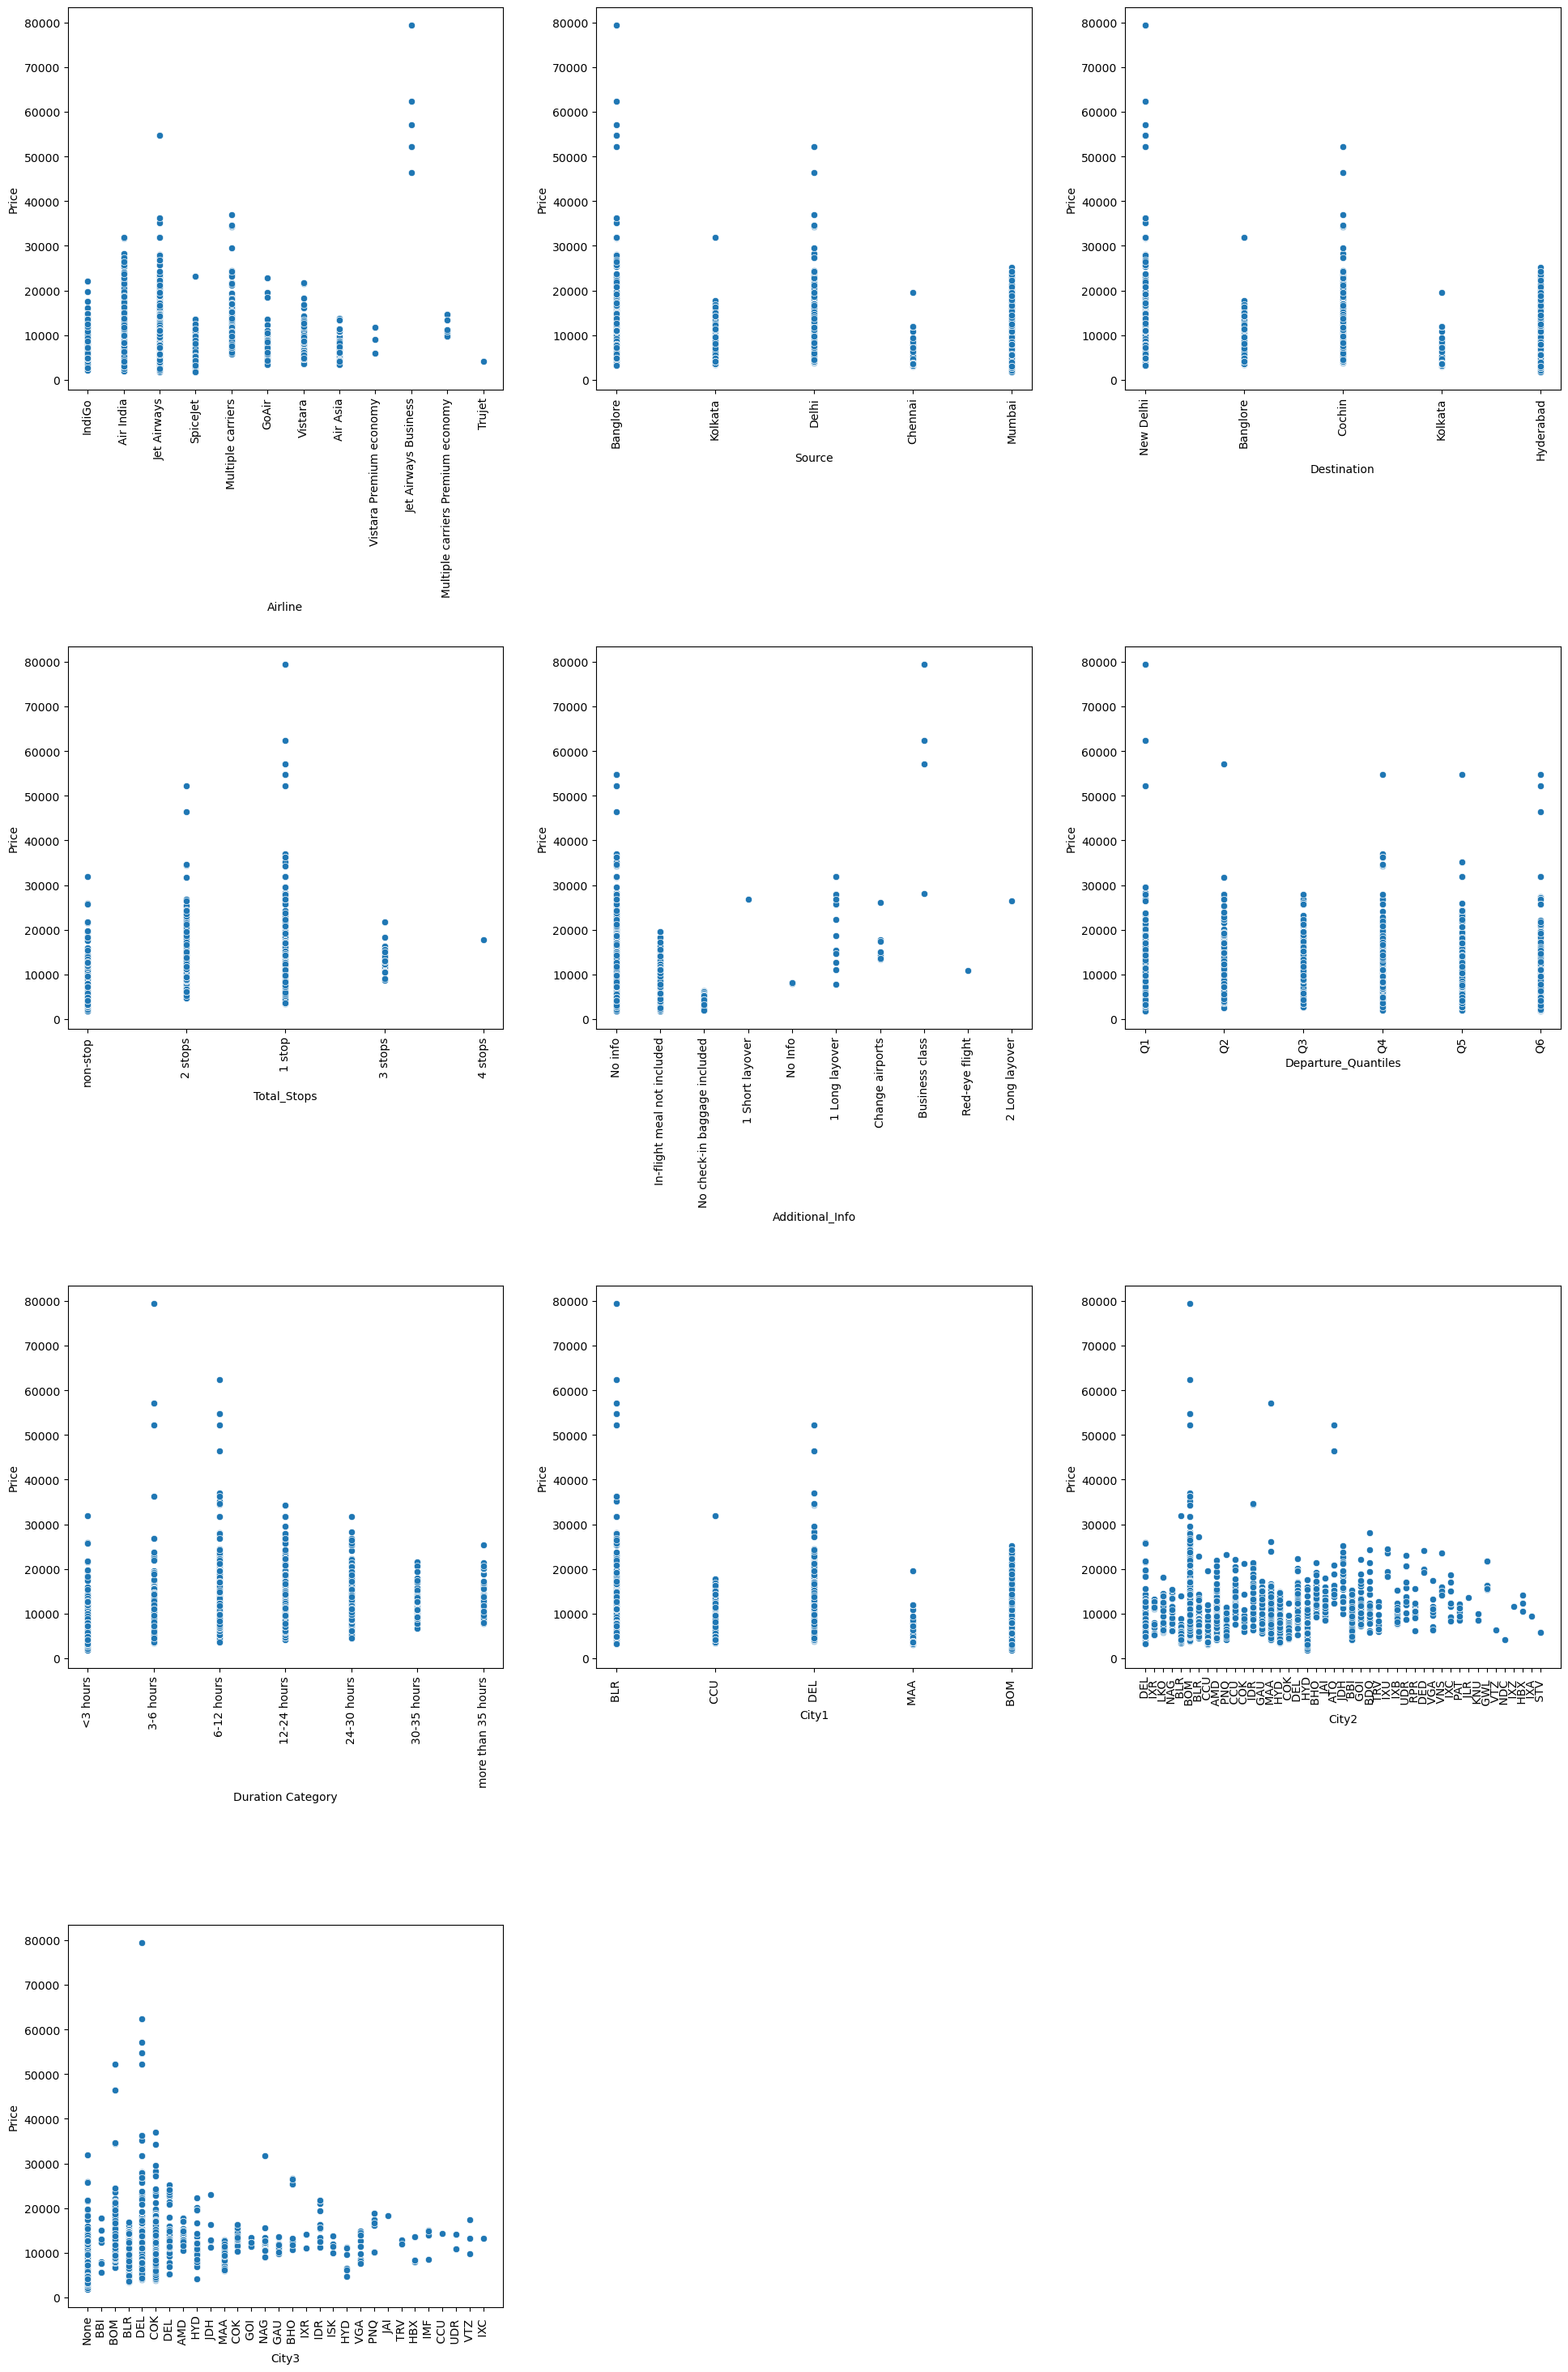

In [126]:
c=1
plt.figure(figsize=(20,45))
for i in categorical:
    plt.subplot(6,3,c)
    sns.scatterplot(x = df[i] , y = df.Price)
    plt.xticks(rotation = 90)
    plt.tight_layout(pad=3.0)
    c=c+1
plt.show()

### Inferences : 
Jet airways business class has the highest prices between 50k — 80k

All the high cost flights depart from bangalore, rest of the flights have prices between 3k — 50k

All high cost flights have destination as Delhi, rest of the flights have prices between 3k — 50k

If a flight is of business class, its price would be high

The flights with high prices having 1 stop, have stop in Bombay

Flights with 2 stops, having higher prices, have stop in Cochin.

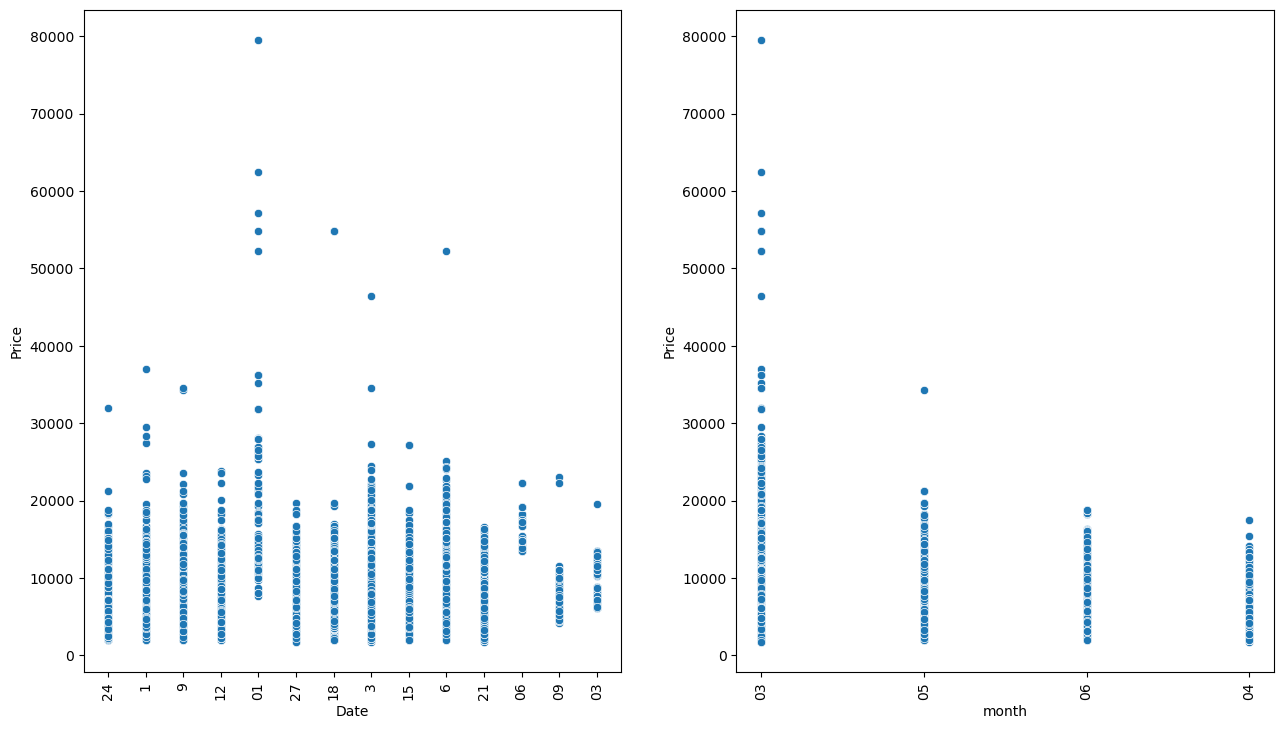

In [127]:
c=1
plt.figure(figsize=(20,45))
for i in numerical:
    plt.subplot(6,3,c)
    sns.scatterplot(x = df[i] , y = df.Price)
    plt.xticks(rotation = 90)
    plt.tight_layout(pad=3.0)
    c=c+1
plt.show()

### Inferences : 

High price flights are lesser during end of month.

Prices are higher in the month of March

## Encoding

In [128]:
df = pd.get_dummies(df, columns=['Airline' ,'Destination','Source','Total_Stops','Additional_Info','Departure_Quantiles'], drop_first=True)

In [129]:
df

,Price,Date,month,Duration Category,City1,City2,City3,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Departure_Quantiles_Q2,Departure_Quantiles_Q3,Departure_Quantiles_Q4,Departure_Quantiles_Q5,Departure_Quantiles_Q6
0,3897,24,03,<3 hours,BLR,DEL,None,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,7662,1,05,6-12 hours,CCU,IXR,BBI,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,13882,9,06,12-24 hours,DEL,LKO,BOM,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,6218,12,05,3-6 hours,CCU,NAG,BLR,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,13302,01,03,3-6 hours,BLR,NAG,DEL,0,0,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4107,9,04,<3 hours,CCU,BLR,None,0,0,0,...,0,0,0,1,0,0,0,0,1,0
10679,4145,27,04,<3 hours,CCU,BLR,None,1,0,0,...,0,0,0,1,0,0,0,0,0,1
10680,7229,27,04,<3 hours,BLR,DEL,None,0,0,0,...,0,0,0,1,0,1,0,0,0,0
10681,12648,01,03,<3 hours,BLR,DEL,None,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [130]:
df.columns

Index(['Price', 'Date', 'month', 'Duration Category', 'City1', 'City2',
       'City3', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Destination_Cochin', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Total_Stops_2 stops',
       'Total_Stops_3 stops', 'Total_Stops_4 stops', 'Total_Stops_non-stop',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No 

In [131]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Duration Category']= le.fit_transform(df['Duration Category'].values)
df['City1']= le.fit_transform(df['City1'].values)
df['City2']= le.fit_transform(df['City2'].values)
df['City3']= le.fit_transform(df['City3'].values)

In [132]:
df

,Price,Date,month,Duration Category,City1,City2,City3,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Departure_Quantiles_Q2,Departure_Quantiles_Q3,Departure_Quantiles_Q4,Departure_Quantiles_Q5,Departure_Quantiles_Q6
0,3897,24,03,5,0,13,29,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,7662,1,05,4,2,25,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,13882,9,06,0,3,32,4,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,6218,12,05,2,2,34,3,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,13302,01,03,2,0,34,8,0,0,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4107,9,04,5,2,5,29,0,0,0,...,0,0,0,1,0,0,0,0,1,0
10679,4145,27,04,5,2,5,29,1,0,0,...,0,0,0,1,0,0,0,0,0,1
10680,7229,27,04,5,0,13,29,0,0,0,...,0,0,0,1,0,1,0,0,0,0
10681,12648,01,03,5,0,13,29,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [133]:
df.columns

Index(['Price', 'Date', 'month', 'Duration Category', 'City1', 'City2',
       'City3', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Destination_Cochin', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Total_Stops_2 stops',
       'Total_Stops_3 stops', 'Total_Stops_4 stops', 'Total_Stops_non-stop',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No 

In [134]:
df.shape

(10682, 44)

### Scaling the Data
We use standard scaler for this process <br>

‘StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance’

In [135]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [136]:
ds_x = df.drop('Price' , axis =1)

In [137]:
dataset = sc.fit_transform(ds_x)

In [138]:
X = pd.DataFrame(dataset , columns = ds_x.columns)

## KNN regression

In [139]:
X

,Date,month,Duration Category,City1,City2,City3,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Departure_Quantiles_Q2,Departure_Quantiles_Q3,Departure_Quantiles_Q4,Departure_Quantiles_Q5,Departure_Quantiles_Q6
0,1.237288,-1.467402,1.061737,-1.674190,0.137651,1.395124,-0.442785,-0.136005,2.050151,-0.750530,...,-0.477301,-0.016761,-0.175733,0.52934,-0.009676,-0.549733,-0.341560,-0.466476,-0.435961,2.305856
1,-1.475307,0.250289,0.582567,-0.016066,1.636517,-1.082291,2.258432,-0.136005,-0.487769,-0.750530,...,-0.477301,-0.016761,-0.175733,0.52934,-0.009676,-0.549733,-0.341560,-0.466476,-0.435961,-0.433678
2,-0.531796,1.109135,-1.334113,0.812996,2.510856,-0.816854,-0.442785,-0.136005,-0.487769,1.332391,...,-0.477301,-0.016761,-0.175733,0.52934,-0.009676,1.819064,-0.341560,-0.466476,-0.435961,-0.433678
3,-0.177979,0.250289,-0.375773,-0.016066,2.760667,-0.905333,-0.442785,-0.136005,2.050151,-0.750530,...,-0.477301,-0.016761,-0.175733,0.52934,-0.009676,-0.549733,-0.341560,-0.466476,2.293781,-0.433678
4,-1.475307,-1.467402,-0.375773,-1.674190,2.760667,-0.462937,-0.442785,-0.136005,2.050151,-0.750530,...,-0.477301,-0.016761,-0.175733,0.52934,-0.009676,-0.549733,-0.341560,2.143735,-0.435961,-0.433678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,-0.531796,-0.608557,1.061737,-0.016066,-0.861593,1.395124,-0.442785,-0.136005,-0.487769,-0.750530,...,-0.477301,-0.016761,-0.175733,0.52934,-0.009676,-0.549733,-0.341560,-0.466476,2.293781,-0.433678
10678,1.591104,-0.608557,1.061737,-0.016066,-0.861593,1.395124,2.258432,-0.136005,-0.487769,-0.750530,...,-0.477301,-0.016761,-0.175733,0.52934,-0.009676,-0.549733,-0.341560,-0.466476,-0.435961,2.305856
10679,1.591104,-0.608557,1.061737,-1.674190,0.137651,1.395124,-0.442785,-0.136005,-0.487769,1.332391,...,-0.477301,-0.016761,-0.175733,0.52934,-0.009676,1.819064,-0.341560,-0.466476,-0.435961,-0.433678
10680,-1.475307,-1.467402,1.061737,-1.674190,0.137651,1.395124,-0.442785,-0.136005,-0.487769,-0.750530,...,-0.477301,-0.016761,-0.175733,0.52934,-0.009676,-0.549733,2.927744,-0.466476,-0.435961,-0.433678


In [140]:
y = df['Price']

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3,random_state=42)

In [143]:
from sklearn.neighbors import KNeighborsRegressor
Knn_model = KNeighborsRegressor(n_neighbors= 15)
Knn_model.fit(X_train,y_train) #fitting the model using X_train and y_train learning of model

KNeighborsRegressor(n_neighbors=15)

In [144]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = Knn_model.predict(X_train) # predicting values using X_train
mse_knn = mean_squared_error(y_train, train_preds)# comparing above values with our actual values of y_train and finding error
print(mse_knn)
test_pred = Knn_model.predict(X_test)
mse_testknn = mean_squared_error(test_pred , y_test)
print(mse_testknn)

4986389.741872706
4576071.435972959


### KNN CV

In [145]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
# Create a KNN regressor
knn = KNeighborsRegressor(n_neighbors=10)

# Perform cross-validation
scores_train = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive and compute mean
mse_scores_train = -scores_train
mean_cv_train = np.mean(mse_scores_train)

# Print the mean squared error
print("Mean Squared Error:", mean_cv_train)

Mean Squared Error: 5682999.3150702


In [146]:
# Create a KNN regressor
knn = KNeighborsRegressor(n_neighbors=10)

# Perform cross-validation
scores_test = cross_val_score(knn, X_test, y_test, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive and compute mean
mse_scores_test = -scores_test
mean_test_cv = np.mean(mse_scores_test)

# Print the mean squared error
print("Mean Squared Error:", mean_test_cv)

Mean Squared Error: 6232512.135332294


## Linear Regression

In [147]:
from sklearn.linear_model import LinearRegression

In [148]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [149]:
lr_train = lr.predict(X_train)
lr_test = lr.predict(X_test)

In [150]:
mse_trainlr = mean_squared_error(y_train,lr_train)
print(mse_trainlr)
mse_testlr = mean_squared_error(y_test,lr_test)
print(mse_testlr)

6586538.770514076
6149169.704553363


In [151]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, lr_train)
r2_test = r2_score(y_test,lr_test)
print(r2_train)
print(r2_test)

0.6955276142472955
0.6985838030128556


## Decision Tree

In [152]:
from sklearn.tree import DecisionTreeRegressor 
Dt_model = DecisionTreeRegressor()
Dt_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [153]:
train_pred = Dt_model.predict(X_train)

In [154]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse_Dt = mean_squared_error(y_train,train_pred)
print(mse_Dt)

799396.3993935853


In [155]:
test_pred = Dt_model.predict(X_test)
mse_testdt = mean_squared_error(y_test,test_pred)
print(mse_testdt)

3201340.6860552556


### Important features

In [156]:
from sklearn.ensemble import ExtraTreesRegressor

In [157]:
selection = ExtraTreesRegressor()
selection.fit(X_train,y_train)

ExtraTreesRegressor()

In [158]:
print(selection.feature_importances_)

[9.51806825e-02 5.28684746e-02 1.79245307e-02 1.70308725e-02
 2.54647565e-02 1.49724369e-02 4.87381122e-03 1.73313667e-03
 3.49180266e-02 7.81269056e-02 7.25636847e-02 1.47900429e-02
 9.08851543e-04 7.51793477e-03 3.85979767e-04 2.96850836e-03
 3.04804001e-05 2.84612957e-03 3.73111415e-03 6.77362793e-04
 1.01427835e-02 9.10623238e-04 3.04581596e-03 4.06117965e-03
 3.64348533e-03 1.90714764e-02 2.81093118e-03 1.13746477e-05
 3.82140591e-01 4.18146797e-05 3.35708398e-04 1.44328390e-03
 1.53945445e-03 8.06384713e-02 5.66366007e-06 8.56394658e-05
 7.24889769e-03 2.41132708e-04 7.37297747e-03 5.78980951e-03
 7.25930825e-03 6.81327352e-03 5.83258125e-03]


<Axes: >

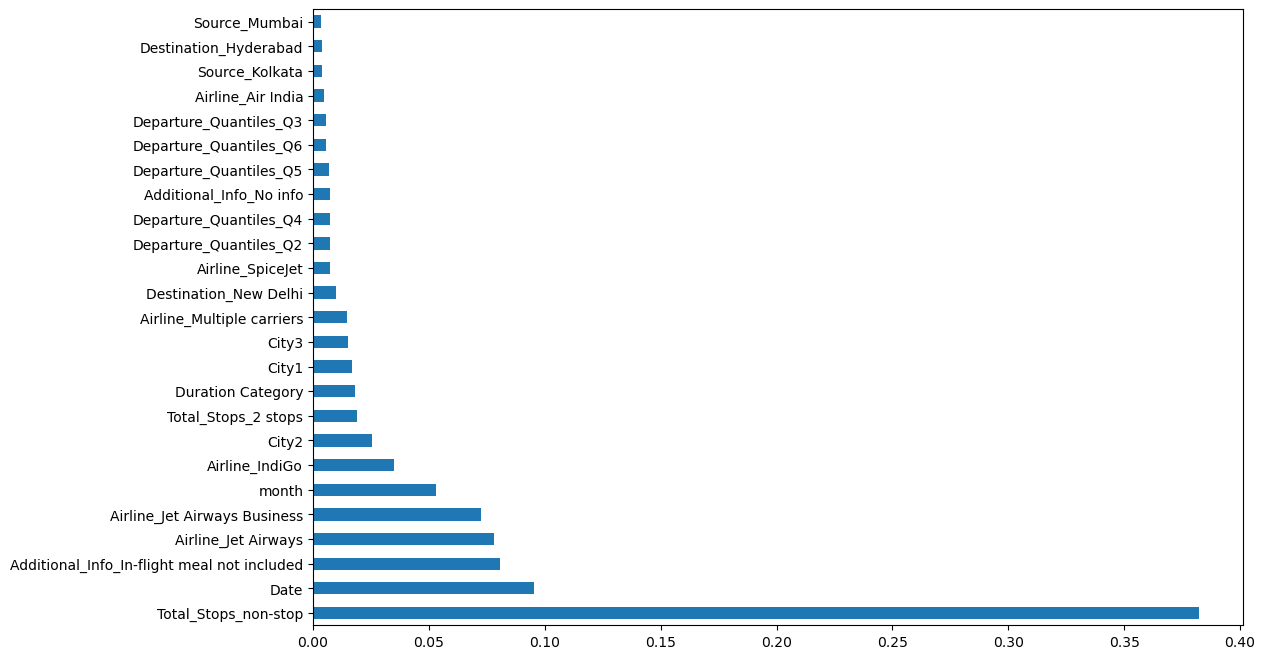

In [159]:
plt.figure(figsize = (12,8))
feature_importance = pd.Series(selection.feature_importances_,index=X_train.columns)
feature_importance.nlargest(25).plot(kind='barh')

In [160]:
# Get the coefficients
coefficients = lr.coef_

# Print the coefficients
print(coefficients)

[-5.29532016e+02 -5.60483885e+02  1.03770210e+02  5.99157615e+15
 -4.20863020e+02  1.09048694e+02  7.69424806e+02  3.33496946e-01
  2.02330365e+02  2.95633776e+03  9.26158159e+02  1.14076569e+03
  1.19978718e+02  9.14210003e+01 -2.83913614e+01  4.62517470e+02
  5.73721397e+01 -1.29057929e+15  4.47266390e+14 -7.75211629e+14
  3.63728721e+15 -1.24085698e+15 -1.62733587e+15 -4.14894114e+14
  5.48380603e+14  7.94022209e+02  2.54460661e+02  1.57705266e+01
 -2.06248776e+03  5.07493880e+01  5.09273126e+01  2.87378700e+02
 -6.98289958e+01 -4.31081761e+03 -1.51753104e+02 -1.32464016e+03
 -3.07212638e+03 -2.24202891e+01  9.81919868e+01  7.37500754e+01
  1.66654127e+02 -9.08011289e+00  2.00406859e+02]


Summary Of Project : 

### 1. Exploratory Data Analysis and Data Preprocessing:

#### Data Overview and Summary Statistics:
- **Dataset Dimensions**: Observed the dataset contains 10683 rows and 11 columns.
- **Target Variable Identification**: Recognized 'Price' as the target variable for modeling.

#### Descriptive Analysis:
- **5-Point Summary Analysis**: Conducted a comprehensive examination of central tendencies and spread for key variables (e.g., min, max, median, quartiles).

#### Feature Engineering:
- **Date and Month Extraction**: Created new columns for 'Date' and 'Month' extracted from the 'Date of Journey' column.
- **Time Categorization**: Transformed 'Departure' time into six categories divided into 4-hour intervals.
- **Handling Arrival Inconsistencies**: Verified consistency between 'Arrival' and 'Duration' columns. Preferred 'Duration' data if correlated and consistent.

#### Data Transformation:
- **Duration Categorization**: Grouped 'Duration' data into categories to draw valuable insights.
- **Route Transformation**: Converted the 'Route' column into multiple city columns, each representing a stop.

#### Data Treatment:
- **Skewness and Outlier Handling**: Employed log transformation to address skewness and outliers.
- **Missing Values Handling**: Addressed missing data within the dataset.

#### Analysis and Insights:
- Leveraged matplotlib and seaborn for comprehensive analysis:
  - **Temporal Trends**: Identified high flight frequency on the 9th day of the month and during May.
  - **Price Outliers**: Noted price outliers associated with specific source locations and airlines.
  - **Booking Patterns**: Explored booking tendencies concerning flight duration, stops, and destinations.

### 2. Encoding the Data:

#### Data Transformation for Modeling:
- Utilized One-Hot Encoding and Label Encoding techniques to transform categorical variables for suitable model input.

### 3. Scaling the Data:

#### Standardization for Modeling:
- Applied the Standard Scaler to standardize features for modeling accuracy and consistency.

### 4. Model Fitting and Evaluation:

#### Model Training and Performance Evaluation:
- **Model Suite**: Trained multiple machine learning models, including:
  - K-Nearest Neighbors (KNN)
  - Linear Regression
  - Decision Tree
- **Evaluation Metrics**: Assessed model performance using Mean Squared Error (MSE) on training and test datasets.

### 5. Strategies for Improving Model Performance:

#### Recommendations for Enhanced Modeling:
- ***Feature Engineering and Selection**: Suggested exploring additional features or refining existing ones to capture more nuances in the data.
- **Regularization Techniques**: Proposed employing L1 or L2 regularization to prevent overfitting in linear models.
- **Hyperparameter Tuning**: Advised experimenting with different hyperparameters for each model to achieve optimal performance.


## Notable Inferences and Insights from Analysis:

### 1. Temporal Insights:
- **Date and Month Trends:** Discovered significant trends in flight bookings based on specific dates and months.
  - *9th Day of the Month*: Noted a higher frequency of flights on this particular day.
  - *May as the Peak Month*: Found that May had the highest number of flights in the dataset.

### 2. Price Analysis:
- **Outliers and Price Variations**:
  - *Source Location Impact*: Detected outliers in flight prices associated with particular source locations. For instance, flights originating from Bangalore tended to have more extreme price variations compared to those from Chennai.
  - *Airlines and Price Disparities*: Observed that certain airlines, particularly Jet Airways, displayed more significant price outliers compared to others.

### 3. Booking Patterns:
- **Flight Duration and Stops**:
  - *Flight Duration Preferences*: Found that flights lasting less than 3 hours were booked more frequently.
  - *Stops Influence*: Noted a preference for flights with 1 stop over those with multiple stops.

### 4. Route and Stops:
- **Stop Analysis**:
  - *Most Common Stop*: Discovered that the majority of flights had a stop in Bombay.
  - *Number of Stops*: Found that most flights either had no second stop or, if they did, it was often in Cochin.

### 5. Class and Price Relationships:
- **Class-Price Dynamics**:
  - *Business Class Pricing*: Highlighted that flights classified as business class tend to have higher prices, often falling within the range of 50k to 80k.
  - *Source-Destination Price Correlation*: Noted specific price ranges for flights departing from Bangalore and arriving in Delhi, indicating a significant price variation compared to other routes.

### 6. Seasonal Impact on Prices:
- **Month-wise Pricing**:
  - *Price Variations by Month*: Discovered that flight prices were higher in March, suggesting a seasonal impact on pricing.

### 7. Correlations in Flight Characteristics:
- **Correlation Analysis**:
  - *Price and Flight Features*: Identified correlations between prices and various flight features, such as stops, destinations, timings, and airline types, indicating the influence of these factors on ticket prices.

